<a href="https://colab.research.google.com/github/OlgaPriyutova/Feature-Importance-and-Feature-Engineering-/blob/main/PCA_and_FCE_on_XGBCLassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn import metrics

In [ ]:
from xgboost import XGBClassifier


In [ ]:

# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=2500, n_features=25, n_informative=5, n_redundant=20, random_state=42)
# summarize the dataset
print(X.shape, y.shape)


(2500, 25) (2500,)


In [ ]:
X=pd.DataFrame(X)
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.541429,-4.318897,-1.642974,1.968950,0.717840,-2.295741,-2.104132,0.814007,1.033471,-0.065134,...,-0.439019,3.476117,2.056304,-0.730376,-1.805060,-2.163203,-1.233533,-0.678113,1.369870,-0.386439
1,-0.177967,0.092083,-2.124335,0.192293,-3.826816,-3.248624,1.051480,-1.751444,-1.710400,-0.777456,...,-2.319364,-1.035908,1.826485,0.473686,1.396610,0.064954,4.857308,-2.672626,2.405192,0.703491
2,-0.274580,-0.053376,-0.987567,0.268126,-2.069771,-1.700350,0.623295,-0.755680,-0.389871,-0.432745,...,-1.375098,-0.841344,1.242397,0.004372,0.641676,0.472366,2.364901,-1.134208,1.139679,0.453794


In [ ]:
# logistic regression for feature importance

# define the model
model=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
 
# fit the model
model = model.fit(X, y)
# get importance


In [ ]:
print('Cross validation accuracy:',cross_val_score(model, X,y).mean())
print('Accuracy:',model.score(X,y))


Cross validation accuracy: 0.9148
Accuracy: 0.9988


In [ ]:
# Check how many feachures we need for the highest accuracy: 



In [ ]:
features = list(range(2,26))
mean_accuracy = []

for i in features:
  pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree'), n_features_to_select=i)),
                     ('log_reg', XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree'))])
  
  
  pipe.fit(X,y)

  scores = cross_val_score(pipe, X, y, cv=5)
  
  mean_accuracy.append(scores.mean())

print(mean_accuracy)

[0.85, 0.8708, 0.8976000000000001, 0.8968, 0.8964000000000001, 0.9056000000000001, 0.9056, 0.9048, 0.906, 0.9096, 0.9088, 0.9132, 0.9108, 0.9096, 0.9156000000000001, 0.9108, 0.9168, 0.9168000000000001, 0.9132000000000001, 0.9188000000000001, 0.9164000000000001, 0.9124000000000001, 0.9168, 0.9148]


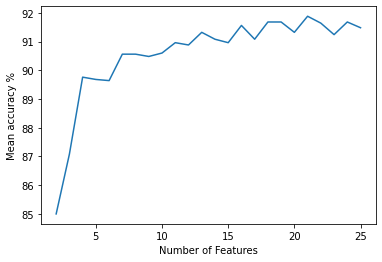

In [ ]:
k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
# 5 features are enough for highest accuracy.  

In [ ]:
#Let us check which features are important and apply them directly: 

In [ ]:
pca = PCA(0.999)
pca.fit(X)

X_components = pca.transform(X)

print('Before Feature Engineering:', cross_val_score(model, X,y).mean())


Before Feature Engineering: 0.9148


In [ ]:
print('After Feature Engineering:', cross_val_score(model, X_components,y).mean())

After Feature Engineering: 0.8912000000000001


In [ ]:

prediction=model.predict(X)

In [ ]:
#Measuring accuracy on Testing Data
print(metrics.classification_report(y, prediction))
print(metrics.confusion_matrix(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1256
           1       1.00      1.00      1.00      1244

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1253    3]
 [   0 1244]]
